# ML in Python- Unsupervised Learning Algorithms

### 1) Importing Libraries and Loading Data

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [64]:
#Create a path to where your data is stored.
path = r'C:\Users\wjzak\Dropbox\Career Foundry\Data Specialization\Module 2\01-2026- Analysis\01 Data'

In [65]:
#Read in the Regular weather data.
climate = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))
climate

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [66]:
#Read in the Pleasant weather data.
pleasant = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasant

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 2) Data Cleaning for Exercise

In [67]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Columns: 170 entries, DATE to VALENTIA_temp_max
dtypes: float64(145), int64(25)
memory usage: 29.8 MB


In [68]:
pleasant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   DATE                         22950 non-null  int64
 1   BASEL_pleasant_weather       22950 non-null  int64
 2   BELGRADE_pleasant_weather    22950 non-null  int64
 3   BUDAPEST_pleasant_weather    22950 non-null  int64
 4   DEBILT_pleasant_weather      22950 non-null  int64
 5   DUSSELDORF_pleasant_weather  22950 non-null  int64
 6   HEATHROW_pleasant_weather    22950 non-null  int64
 7   KASSEL_pleasant_weather      22950 non-null  int64
 8   LJUBLJANA_pleasant_weather   22950 non-null  int64
 9   MAASTRICHT_pleasant_weather  22950 non-null  int64
 10  MADRID_pleasant_weather      22950 non-null  int64
 11  MUNCHENB_pleasant_weather    22950 non-null  int64
 12  OSLO_pleasant_weather        22950 non-null  int64
 13  SONNBLICK_pleasant_weather   22950 non-null  i

In [69]:
climate.shape

(22950, 170)

In [70]:
pleasant.shape

(22950, 16)

In [71]:
# Drop columns starting with 'GDANSK', 'ROMA', or 'TOURS' from climate dataset
# These are not available in the pleasant dataset
climate = climate.drop(columns=[col for col in climate.columns if col.startswith(('GDANSK', 'ROMA', 'TOURS'))])

In [72]:
#Reduce dataset to one decade - 1990s.
df1990s = climate[climate['DATE'].astype(str).str.contains('199')] #<-----INSERT YEAR HERE
df1990s

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
10958,19900101,1,0,2.1,0.83,1.0217,0.60,0.00,0,7.2,...,3,0.82,1.0068,0.20,0.51,0,2.0,6.9,4.5,9.4
10959,19900102,1,2,2.1,0.84,1.0238,0.48,0.00,0,2.3,...,5,0.79,1.0040,0.21,1.48,0,0.1,7.3,4.7,9.9
10960,19900103,1,8,2.1,0.89,1.0231,0.20,0.00,0,0.0,...,4,0.90,1.0094,0.38,0.00,0,4.9,7.8,4.8,10.7
10961,19900104,1,2,2.1,0.77,1.0265,0.54,0.00,0,5.6,...,6,0.93,1.0112,0.13,0.92,0,0.0,6.5,2.0,11.0
10962,19900105,1,7,2.1,0.81,1.0286,0.23,0.04,0,0.2,...,4,0.91,1.0108,0.20,0.56,0,1.2,9.4,7.2,11.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,19991227,12,7,2.1,0.74,0.9953,0.28,1.93,0,1.0,...,7,0.75,0.9954,0.15,0.41,0,0.1,4.8,3.0,7.5
14606,19991228,12,8,2.1,0.88,0.9956,0.13,1.22,0,0.0,...,3,0.73,1.0102,0.41,0.03,0,5.1,5.3,2.5,8.1
14607,19991229,12,8,2.1,0.84,1.0162,0.21,0.11,1,0.1,...,5,0.81,1.0229,0.35,0.85,0,3.9,7.1,4.2,9.1
14608,19991230,12,7,2.1,0.80,1.0276,0.26,0.01,0,0.5,...,8,0.94,1.0171,0.14,0.27,0,0.0,8.4,5.5,11.2


In [73]:
# Scale only numeric columns, excluding id/DATE/MONTH
exclude = ['id', 'DATE', 'MONTH']
cols_to_scale = [c for c in df1990s.columns if c not in exclude and pd.api.types.is_numeric_dtype(df1990s[c])]
scaler = StandardScaler()
df_scaled = df1990s.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df1990s[cols_to_scale])
df_scaled.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
10958,19900101,1,-2.301538,-0.12338,0.747494,0.407104,-0.743295,-0.423475,-0.159903,0.615915,...,-1.680451,-0.075095,-0.633204,-1.047233,0.124855,-0.028673,-0.351473,-1.137322,-0.964327,-1.135425
10959,19900102,1,-1.460175,-0.12338,0.843171,0.669114,-0.875659,-0.423475,-0.159903,-0.524042,...,-0.550975,-0.460994,-0.866248,-1.035329,1.526501,-0.028673,-0.868123,-1.028306,-0.913966,-1.006265
10960,19900103,1,1.063914,-0.12338,1.321554,0.581777,-1.184508,-0.423475,-0.159903,-1.059123,...,-1.115713,0.953971,-0.416805,-0.832962,-0.612094,-0.028673,0.437099,-0.892035,-0.888786,-0.799609
10961,19900104,1,-1.460175,-0.12338,0.173434,1.005984,-0.809477,-0.423475,-0.159903,0.243684,...,0.013763,1.339870,-0.266991,-1.130561,0.717303,-0.028673,-0.895315,-1.246339,-1.593835,-0.722114
10962,19900105,1,0.643233,-0.12338,0.556140,1.267994,-1.151417,-0.351404,-0.159903,-1.012595,...,-1.115713,1.082604,-0.300283,-1.047233,0.197104,-0.028673,-0.569010,-0.455969,-0.284458,-0.541290


### 3) Dendrogram Tree

In [74]:
### 3) Generate Features for Dendrogram Linkage
# Extract only numeric features (excluding id, DATE, MONTH)
exclude = ['id', 'DATE', 'MONTH']
features = df_scaled[[col for col in df_scaled.columns if col not in exclude and pd.api.types.is_numeric_dtype(df_scaled[col])]]

# Display the feature matrix
print(f"Feature matrix shape: {features.shape}")
print(f"Features: {features.columns.tolist()}")
print(features.head())

Feature matrix shape: (3652, 147)
Features: ['BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_cloud_cover', 'DEBILT_wind_speed', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_wind_speed', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global

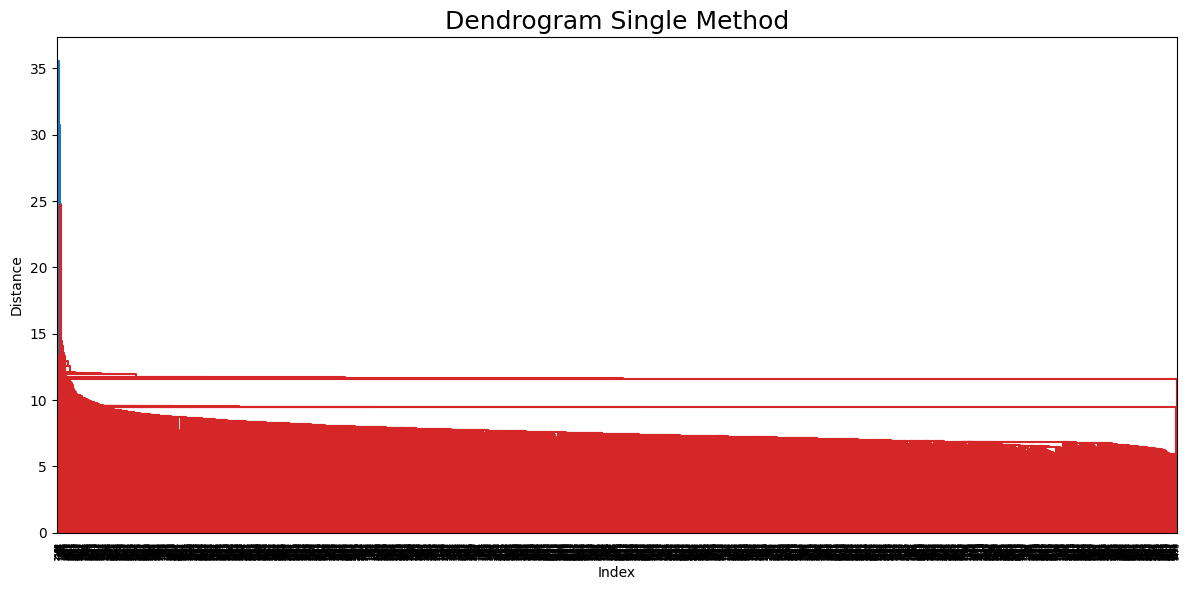

In [75]:
# Choose Method for Linkage
distance_single = linkage(features, method='single')

# Create dendrogram
plt.figure(figsize=(12, 6))
dendrogram(distance_single, leaf_rotation=90)
plt.title('Dendrogram Single Method',fontsize=18)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

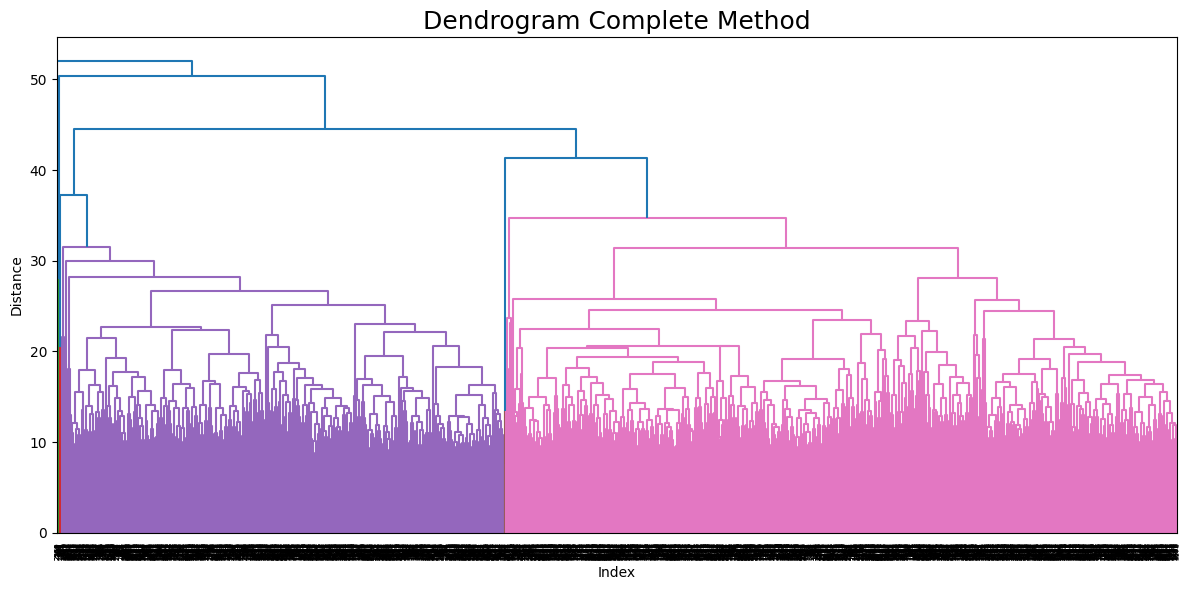

In [76]:
# Choose Method for Linkage - Complete Method
distance_complete = linkage(features, method='complete')

# Create dendrogram
plt.figure(figsize=(12, 6))
dendrogram(distance_complete, leaf_rotation=90)
plt.title('Dendrogram Complete Method',fontsize=18)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

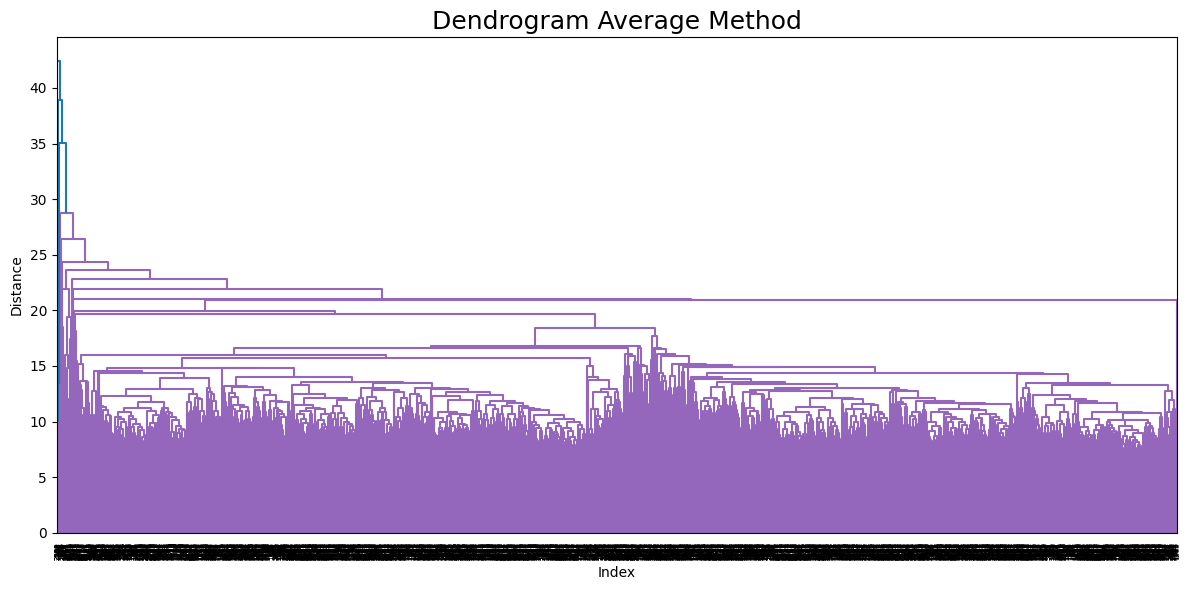

In [77]:
# Choose Method for Linkage - Average Method
distance_average = linkage(features, method='average')

# Create dendrogram
plt.figure(figsize=(12, 6))
dendrogram(distance_average, leaf_rotation=90)
plt.title('Dendrogram Average Method',fontsize=18)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

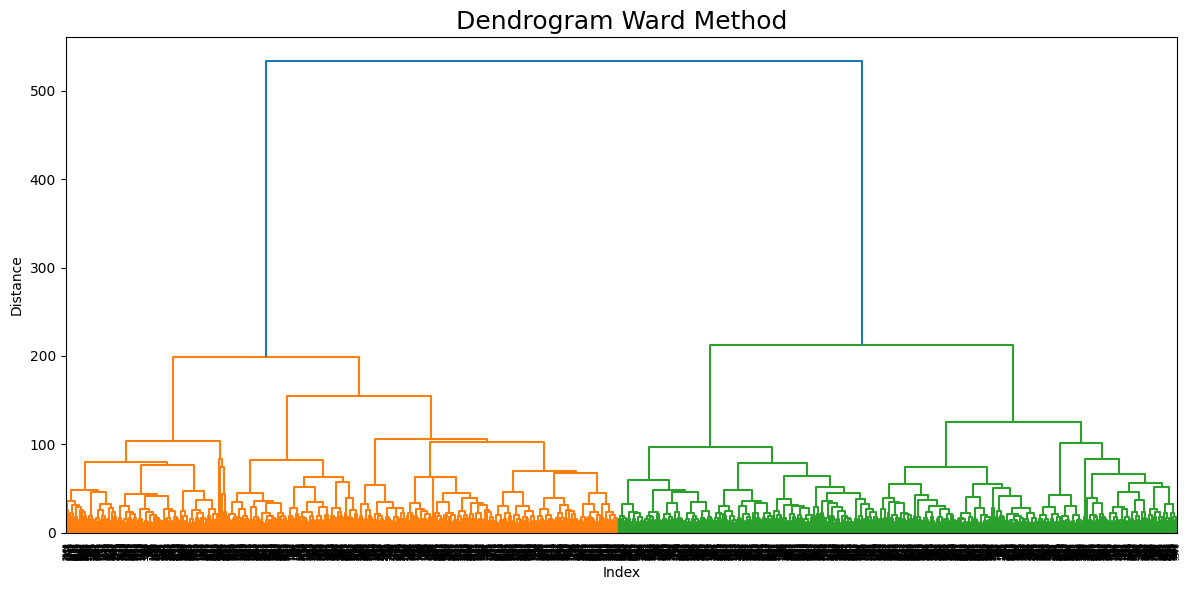

In [78]:
# Choose Method for Linkage - Ward Method
distance_ward = linkage(features, method='ward')

# Create dendrogram
plt.figure(figsize=(12, 6))
dendrogram(distance_ward, leaf_rotation=90)
plt.title('Dendrogram Ward Method',fontsize=18)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

### 4) Principal Component Analysis

In [83]:
# Create a years dataframe from df_scaled for each year of the 90s
years_dfs = {}

for year in range(1990, 2000):
    year_str = str(year)
    years_dfs[year] = df_scaled[df_scaled['DATE'].astype(str).str.startswith(year_str)]

In [84]:
# Run PCA model reducing to 5 components across all years
pca = PCA(n_components=5)
principal_components = pca.fit_transform(df_scaled[cols_to_scale])

In [85]:
# Make a dataframe of the new components
dfPCA = pd.DataFrame(
    principal_components,
    columns=[f'PCA{i}' for i in range(1, 6)]
)

In [86]:

# Add the Pleasant Weather data
pleasant_1990s = pleasant[pleasant['DATE'].astype(str).str.contains('199')]
pleasant_cols = [col for col in pleasant_1990s.columns if col != 'DATE']
dfPCA['Pleasant_Weather'] = pleasant_1990s[pleasant_cols].mean(axis=1).values[:len(dfPCA)]
dfPCA['Pleasant_Weather'] = (dfPCA['Pleasant_Weather'] > 0.5).map({True: 'Yes', False: 'No'})

dfPCA

,PCA1,PCA2,PCA3,PCA4,PCA5,Pleasant_Weather
0,-10.957492,2.442347,2.226863,-0.046812,2.406228,No
1,-11.439991,2.277300,1.554125,0.651248,2.323725,No
2,-11.509257,1.922020,1.396949,0.876290,1.697859,No
3,-10.497637,4.457652,3.290627,-0.676940,0.210355,No
4,-10.198109,2.604600,4.413382,1.924977,-0.212214,No
...,...,...,...,...,...,...
3647,-8.931104,-7.988754,-3.801966,-3.214593,1.298319,No
3648,-10.171000,-8.059537,-6.536184,0.810917,1.355316,No
3649,-10.624321,-1.409605,-2.516470,0.317841,0.562792,No
3650,-11.074527,1.087983,1.986637,1.090391,-1.170676,No


In [87]:
dfPCA['Pleasant_Weather'].value_counts()

Pleasant_Weather
No     2994
Yes     658
Name: count, dtype: int64

In [ ]:
#PCA variance ratio explained
pca.explained_variance_ratio_

array([0.36972509, 0.10421264, 0.05487695, 0.04616333, 0.03136309])

<Axes: xlabel='PCA1', ylabel='PCA2'>

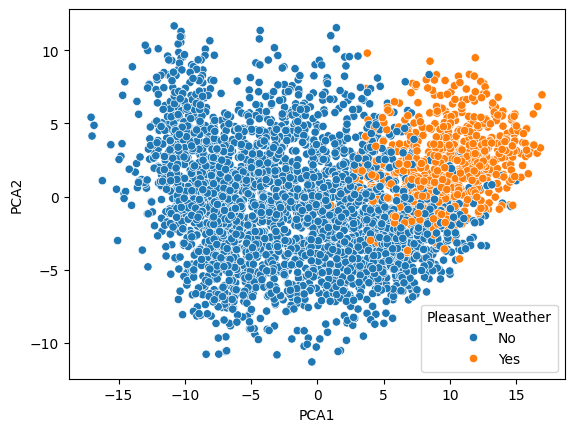

In [ ]:
#visualization of PCs v Plesant Weather
sns.scatterplot(x='PCA1', y='PCA2', hue='Pleasant_Weather', data=dfPCA)

In [89]:
#Export the PCA dataframe to a CSV file
dfPCA.to_csv(os.path.join(path, '1990s_PCA.csv'), index=False)